# Matplotlib Example

This is an example notebook describing the basics of Matplotlib, a plotting library for Python. More details are available on the [Matplotlib Home Page](https://matplotlib.org/).

This example uses an [automotive](https://archive.ics.uci.edu/ml/datasets/Automobile) data set from [University of California, Irvine](https://uci.edu/).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

## Basic Line Plot

The following example generates sine a cosine curves as a list of values and plots them. Some basic plot customizations are also demonstrated.

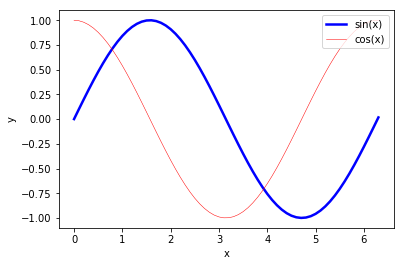

In [2]:
x = [0.1*i for i in range(64)]
sin = [math.sin(i) for i in x]
cos = [math.cos(i) for i in x]

plt.plot(x, sin, label='sin(x)', color='blue', linewidth=2.5)
plt.plot(x, cos, label='cos(x)', color='red', linewidth=0.5)
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='upper right')
plt.show()

## Plotting Pandas Data

Pandas can create plots directly from a data frame. The following cell loads automobile data from a text file.

In [3]:
columnNames = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
               'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
               'engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
               'horsepower','peak_rpm','city_mpg','highway_mpg','price']

cars = pd.read_csv('data/imports-85.data', sep=',', names = columnNames)

There are some missing values for horsepower and price. The following cell selects only rows with numeric values for horsepower and price, then it converts those columns to floating point types.

In [4]:
df = cars[cars.horsepower.str.isnumeric() & cars.price.str.isnumeric()].copy()
df.horsepower = df.horsepower.astype(float)
df.price = df.price.astype(float)

Pandas dataframes contain an easy to use plot method. The following scatter plot shows that more expensive cars tend to produce more power.

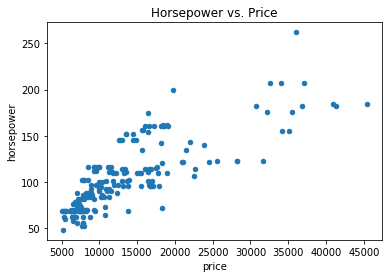

In [5]:
df.plot(kind='scatter', x='price', y='horsepower', title='Horsepower vs. Price')

## Aggregating Data

Pandas can perform aggregate calculations, similar to by the group-by clause in SQL. The following example is equivalent of the SQL query

`SELECT count(make) FROM cars GROUP BY make ORDER BY make`

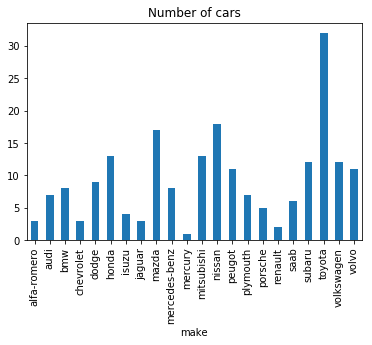

In [7]:
# This could all be done in one line, but it has been formatted for clarity

groups = cars.groupby(['make'], sort=True)
counts = groups['make'].count()
counts.plot(kind='bar', title='Number of cars')